In [190]:
import numpy as np
from scipy import io, integrate, linalg, signal
from scipy.sparse.linalg import cg, eigs
import matplotlib as mpl
import matplotlib.pyplot as plt

# Capítulo 5

## Exemplo 5.1

In [191]:
A = np.array([[-7, 0, 2], [7, -8, 0], [0, 8, -8]])
B = np.array([-50, -1, 0])
C = linalg.solve(A, B)
print(C)

[9.57142857 8.5        8.5       ]


## Exemplo 5.2

In [192]:
A = np.array([[-250, 0, 40], [240, -250, 0], [0, 240, -250]])
B = np.array([-6500, -2500, -2500])
# T = linalg.solve(A, B)
T = linalg.inv(A) @ B
print(T)

[34.17536221 42.80834772 51.09601381]


## Newton-Rhapson para Sistemas de Equações Não Lineares

In [193]:
def newton_rhapson(f, x_est, df = None, i_max = 20, dx = 1e-6):
    x = [list(x_est)]
    for i in range(i_max):
        X = np.array(x[i])
        if df is None:
            dF = np.array(diff(f, x[i], dx))
        else:
            dF = np.array(df(X))
        F = np.array(f(X))
        X = X - linalg.inv(dF) @ F
        x.append(list(X))
    return x

## Diferenciação Numérica

In [194]:
def diff(f, x, dx = 1e-6):
    df = list()
    x_orig = x.copy()
    for i in range(len(x_orig)):
        x[i] += dx
        df.append((np.array(f(x)) - np.array(f(x_orig))) / dx)
        x = x_orig.copy()
    df = np.array(df).transpose()
    df = [list(i) for i in df]
    return df

## Exemplo da Seção 5.2.1

In [195]:
def f(x):
    Ca = x[0]
    Cb = x[1]
    u = Ca + 0.06*Ca*Cb - 200
    v = Cb + 0.06*Ca*Cb - 200
    return [u, v]

def df(x):
    Ca = x[0]
    Cb = x[1]
    du_dCa = 1 + 0.06*Cb
    du_dCb = 0.06 * Ca
    dv_dCa = 0.06 * Cb
    dv_dCb = 1 + 0.06*Ca
    return [[du_dCa, du_dCb], [dv_dCa, dv_dCb]]

In [196]:
C = newton_rhapson(f, [200, 200], df, i_max = 6)
for i, v in enumerate(C):
    print(i, v)

0 [200, 200]
1 [103.99999999999977, 104.0]
2 [62.979228486646804, 62.97922848664683]
3 [51.18114093652843, 51.18114093652841]
4 [50.011720627032815, 50.01172062703282]
5 [50.00000117724716, 50.000001177247164]
6 [50.000000000000014, 50.00000000000002]


In [197]:
a = df([200, 200])
print(a)
b = diff(f, [200, 200], 1e-4)
print(b)

[[13.0, 12.0], [12.0, 13.0]]
[[12.99999999901047, 12.000000001535227], [11.999999996987754, 13.000000003557943]]


### Problema Proposto 5.1

In [198]:
A = np.array([[0.50, 0.33, 0], [0.50, 0.33, 0.70], [0, 0.34, 0.30]])
print(A)

[[0.5  0.33 0.  ]
 [0.5  0.33 0.7 ]
 [0.   0.34 0.3 ]]


In [199]:
B = np.array([0.30, 0.40, 0.30]) * 100
print(B)

[30. 40. 30.]


In [200]:
F = linalg.inv(A) @ B
print(F)
print(sum(F))

[10.08403361 75.6302521  14.28571429]
100.0


### Problema Proposto 5.2

In [201]:
Qin, Q32, Q43 = 10, 5, 3
V1, V2, V3, V4 = 25, 75, 100, 25
k1, k2, k3, k4 = 0.075, 0.15, 0.4, 0.1
Cain = 1

In [202]:
A = np.array([
    [-1, 0, 0, 0],
    [1, -1, 0, 0],
    [0, 1, -1, 0],
    [0, 0, 1, -1]
])
print(A)

[[-1  0  0  0]
 [ 1 -1  0  0]
 [ 0  1 -1  0]
 [ 0  0  1 -1]]


In [203]:
B = np.array([-Qin, -Q32, -Q43+Q32, Q43])
print(B)

[-10  -5   2   3]


In [204]:
Q = linalg.inv(A) @ B
print(Q)
Q12, Q23, Q34, Qout = Q

[10. 15. 13. 10.]


In [205]:
A = np.array([
    [-Q12-k1*V1, 0, 0, 0],
    [Q12, -Q23-k2*V2, Q32, 0],
    [0, Q23, -Q34-Q32-k3*V3, Q43],
    [0, 0, Q34, -Qout-Q43-k4*V4]
])
print(A)

[[-11.875   0.      0.      0.   ]
 [ 10.    -26.25    5.      0.   ]
 [  0.     15.    -58.      3.   ]
 [  0.      0.     13.    -15.5  ]]


In [206]:
B = np.array([-Qin*Cain, 0, 0, 0])
print(B)

[-10   0   0   0]


In [207]:
C = linalg.inv(A) @ B
print(C)

[0.84210526 0.33821858 0.091437   0.0766891 ]


### Problema Proposto 5.3

In [208]:
def f(x):
    Ca, Cb, Cc, Cd = x
    Cain, Cbin, Ccin, Cdin = 0.7, 0.4, 0, 0
    F = 5 / 60
    k = 0.855
    V = 40
    ua = F*(Cain - Ca) - k*Ca*Cb*V
    ub = F*(Cbin - Cb) - k*Ca*Cb*V
    uc = F*(Ccin - Cc) + k*Ca*Cb*V
    ud = F*(Cdin - Cd) + k*Ca*Cb*V
    return [ua, ub, uc, ud]

In [209]:
def df(x):
    Ca, Cb, Cc, Cd = x
    # Cain, Cbin, Ccin, Cdin = 0.7, 0.4, 0, 0
    F = 5 / 60
    k = 0.855
    V = 40
    dua_dCa = -F - k*Cb*V
    dua_dCb = -k*Ca*V
    dua_dCc = 0
    dua_dCd = 0
    dub_dCa = -k*Cb*V
    dub_dCb = -F - k*Ca*V
    dub_dCc = 0
    dub_dCd = 0
    duc_dCa = k*Cb*V
    duc_dCb = k*Ca*V
    duc_dCc = -F
    duc_dCd = 0
    dud_dCa = k*Cb*V
    dud_dCb = k*Ca*V
    dud_dCc = 0
    dud_dCd = -F
    return [
        [dua_dCa, dua_dCb, dua_dCc, dua_dCd],
        [dub_dCa, dub_dCb, dub_dCc, dub_dCd],
        [duc_dCa, duc_dCb, duc_dCc, duc_dCd],
        [dud_dCa, dud_dCb, dud_dCc, dud_dCd]
    ]

In [210]:
x = [0.7, 0.4, 0, 0]
a = df(x)
print(a)
b = diff(f, x, 1e-4)
print(b)

[[-13.763333333333335, -23.939999999999998, 0, 0], [-13.680000000000001, -24.02333333333333, 0, 0], [13.680000000000001, 23.939999999999998, -0.08333333333333333, 0], [13.680000000000001, 23.939999999999998, 0, -0.08333333333333333]]
[[-13.76333333334756, -23.940000000006734, 0.0, 0.0], [-13.68000000001146, -24.023333333342833, 0.0, 0.0], [13.68000000001146, 23.940000000006734, -0.08333333333609971, 0.0], [13.68000000001146, 23.940000000006734, 0.0, -0.08333333333609971]]


In [211]:
C = newton_rhapson(f, [0.7, 0.4, 0, 0], i_max = 10)
for i, v in enumerate(C):
    print(i, v)
print(sum(C[0]) - sum(C[-1]))

0 [0.700001, 0.4, 0, 0]
1 [0.44601815144756035, 0.14601715144754623, 0.253982848552468, 0.2539828485524609]
2 [0.3375060578719658, 0.03750505787196501, 0.3624949421280341, 0.36249494154977135]
3 [0.3063099380446022, 0.006308938023820709, 0.3936910619553986, 0.39369106195539816]
4 [0.3032209555749126, 0.0032199555749126505, 0.39678004442508735, 0.39678004442508735]
5 [0.3031900635814098, 0.0031890635814099183, 0.3968109364185901, 0.3968109364185901]
6 [0.30319006049115854, 0.0031890604911586143, 0.3968109395088414, 0.3968109395088414]
7 [0.3031900604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
8 [0.3031900604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
9 [0.3031900604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
10 [0.3031890604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
9.999999999177334e-07


# Capítulo 6

Método de Euler

In [212]:
# WIP
def euler(f, IC, int, N=1000):
    X = np.linspace(*int, N + 1)
    h = X[1] - X[0]
    y = np.array(IC.copy())
    Y = list()
    for x in X:
        Y.append(y)
        k1 = h * np.array(f(x, y))
        y = y + k1
    return X, np.array(Y).transpose()

In [213]:
def rk4(f, IC, int, N=1000):
    X = np.linspace(*int, N + 1)
    h = X[1] - X[0]
    y = np.array(IC.copy())
    Y = list()
    for x in X:
        Y.append(y)
        k1 = np.array(f(x, y))
        k2 = np.array(f(x + 0.5*h, y + 0.5*h*k1))
        k3 = np.array(f(x + 0.5*h, y + 0.5*h*k2))
        k4 = np.array(f(x + h, y + h*k3))
        y = y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return X, np.array(Y).transpose()

In [214]:
def gera_dados_edo(x, y, filename='edo'):
    with open(f'dados_{filename}.dat', 'w', encoding='utf8') as file:
        for xi, yi in zip(x, y.transpose()):
            yi = [str(i) for i in yi]
            line = str(xi) + ' ' + ' '.join(yi) + '\n'
            file.write(line)
        file.close()

In [215]:
def edo2_1(x, y):
    t = x
    h = y[0]
    A = 1
    Qin = 3
    Qout = 1 + 0.1*h
    dh = (Qin - Qout) / A
    return [dh]

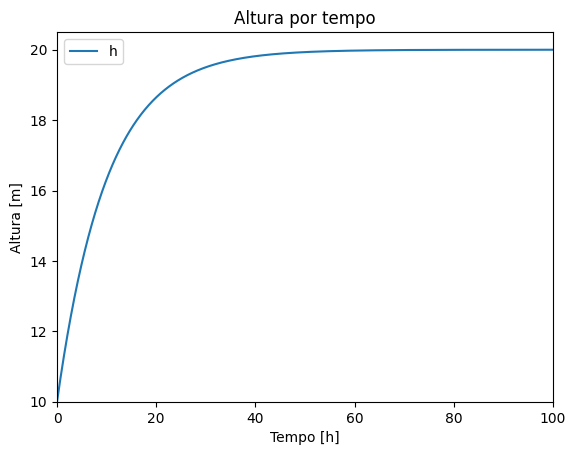

In [216]:
IC = [10]
int = (0, 100)
t, h = rk4(edo2_1, IC, int)

fig, ax = plt.subplots()
ax.plot(t, h[0], label='h')
ax.set_title('Altura por tempo')
ax.set_xlabel('Tempo [h]')
ax.set_ylabel('Altura [m]')
ax.axis([*int, 10, 20.5])
ax.legend()
plt.show()

In [217]:
def edo3_1(x, y):
    t = x
    x = y[0]
    Qin1 = 1
    Qin2 = 1
    Qout = 2
    x1 = 0.02
    x2 = 0.03
    V = 5
    dx = (1 / V) * ((Qin1*x1 + Qin2*x2) - Qout*x)
    return [dx]

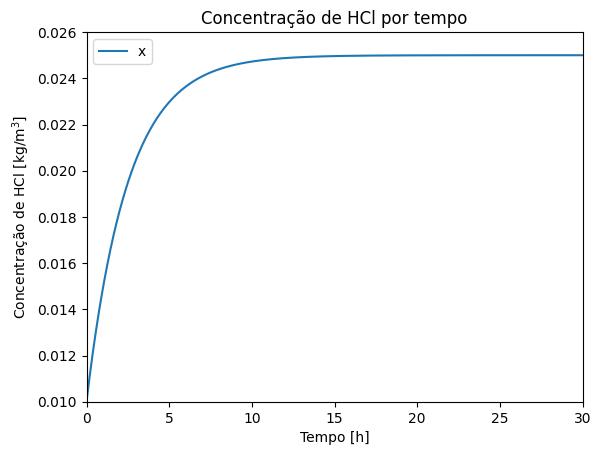

In [218]:
IC = [0.01]
int = (0, 30)
t, x = rk4(edo3_1, IC, int)

fig, ax = plt.subplots()
ax.plot(t, x[0], label='x')
ax.set_title('Concentração de HCl por tempo')
ax.set_xlabel('Tempo [h]')
ax.set_ylabel(r'Concentração de HCl [kg/m$^3$]')
ax.axis([*int, 0.01, 0.026])
ax.legend()
plt.show()

In [219]:
def edo3_3a(x, y):
    t = x
    V = y[0]
    T = y[1]
    Q = 0.5
    Qin = 2 * Q
    Qout1 = Q
    Qout2 = Q
    Tin = 273.15 + 30
    dV = Qin - (Qout1 + Qout2)
    dT = (1 / V) * (Qin*Tin - (Qout1*T + Qout2*T) - T*dV)
    return [dV, dT]

def edo3_3c(x, y):
    t = x
    V = y[0]
    T = y[1]
    Q = 0.5
    Qin = 2 * Q
    Qout1 = Q
    Qout2 = 0
    Tin = 273.15 + 30
    dV = Qin - (Qout1 + Qout2)
    dT = (1 / V) * (Qin*Tin - (Qout1*T + Qout2*T) - T*dV)
    return [dV, dT]

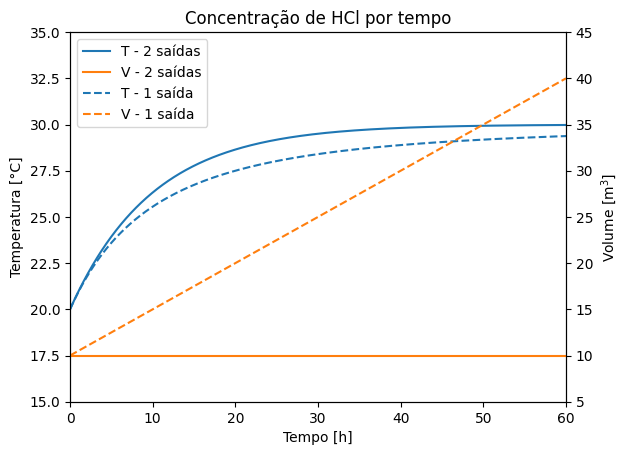

In [220]:
IC = [10, 20 + 273.15]
int = (0, 60)
t, (Va, Ta) = rk4(edo3_3a, IC, int)
t, (Vc, Tc) = rk4(edo3_3c, IC, int)

fig, ax1 = plt.subplots()
la1, = ax1.plot(t, Ta - 273.15, color='C0')
lc1, = ax1.plot(t, Tc - 273.15, color='C0', linestyle='--')
ax2 = ax1.twinx()
la2, = ax2.plot(t, Va, color='C1')
lc2, = ax2.plot(t, Vc, color='C1', linestyle='--')
ax1.set_title('Concentração de HCl por tempo')
ax1.set_xlabel('Tempo [h]')
ax1.set_ylabel('Temperatura [°C]')
ax2.set_ylabel(r'Volume [m$^3$]')
ax1.set_xlim(*int)
ax1.set_ylim([15, 35])
ax2.set_ylim([5, 45])
ax1.legend([la1, la2, lc1, lc2], ['T - 2 saídas', 'V - 2 saídas', 'T - 1 saída', 'V - 1 saída'])
plt.show()

In [221]:
def edo3_4_troca_termica(x, y):
    t = x
    V = y[0]
    x = y[1]
    T = y[2]
    Qin = 2
    Qout = 1
    xin = 0.02
    Tin = 330
    rho = 1000
    cp = 4184
    U = 30 * 3600
    A = 40
    Tinf = 300
    dV = Qin - Qout
    dx = (1 / V) * (Qin*xin - Qout*x - x*dV)
    dT = (1 / V) * (Qin*Tin - Qout*T - (U * A)/(rho * cp)*(T - Tinf) - T*dV)
    return [dV, dx, dT]

def edo3_4_adiabatico(x, y):
    t = x
    V = y[0]
    x = y[1]
    T = y[2]
    Qin = 2
    Qout = 1
    xin = 0.02
    Tin = 330
    rho = 1000
    cp = 4184
    U = 0
    A = 40
    Tinf = 300
    dV = Qin - Qout
    dx = (1 / V) * (Qin*xin - Qout*x - x*dV)
    dT = (1 / V) * (Qin*Tin - Qout*T - (U * A)/(rho * cp)*(T - Tinf) - T*dV)
    return [dV, dx, dT]

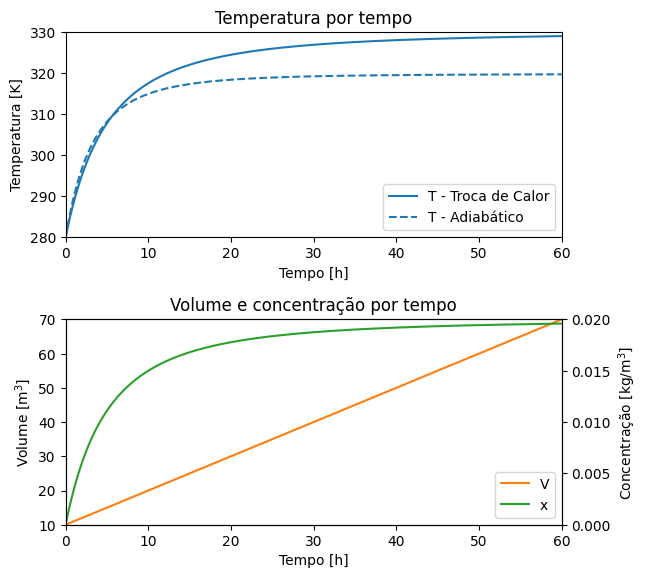

In [222]:
IC = [10, 0, 280]
int = (0, 60)
t, y_tt = rk4(edo3_4_troca_termica, IC, int)
t, y_a = rk4(edo3_4_adiabatico, IC, int)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 6.4))
l1, = ax1.plot(t, y_a[2], color='C0')
l2, = ax1.plot(t, y_tt[2], color='C0', linestyle='--')
ax1.set_title('Temperatura por tempo')
ax1.set_xlabel('Tempo [h]')
ax1.set_ylabel('Temperatura [K]')
ax1.axis([*int, 280, 330])
ax1.legend([l1, l2], ['T - Troca de Calor', 'T - Adiabático'], loc='lower right')

l3, = ax2.plot(t, y_a[0], color='C1')
ax3 = ax2.twinx()
l4, = ax3.plot(t, y_a[1], color='C2')
ax2.set_xlim(*int)
ax2.set_ylim(10, 70)
ax3.set_ylim(0, 0.02)
ax2.set_title('Volume e concentração por tempo')
ax2.set_xlabel('Tempo [h]')
ax2.set_ylabel(r'Volume [m$^3$]')
ax3.set_ylabel(r'Concentração [kg/m$^3$]')
ax2.legend([l3, l4], ['V', 'x'], loc='lower right')

fig.subplots_adjust(hspace=0.4)
plt.show()

In [223]:
def edo3_7(x, y):
    t = x
    T1 = y[0]
    T2 = y[1]
    T3 = y[2]
    T0 = 20 + 273
    W = 100
    m = 1000
    cp = 2
    UA = 10
    Tsteam = 250 + 273.15
    dT1 = (W / m) * (T0 - T1) - (UA) / (m * cp) * (T1 - Tsteam)
    dT2 = (W / m) * (T1 - T2) - (UA) / (m * cp) * (T2 - Tsteam)
    dT3 = (W / m) * (T2 - T3) - (UA) / (m * cp) * (T3 - Tsteam)
    return [dT1, dT2, dT3]

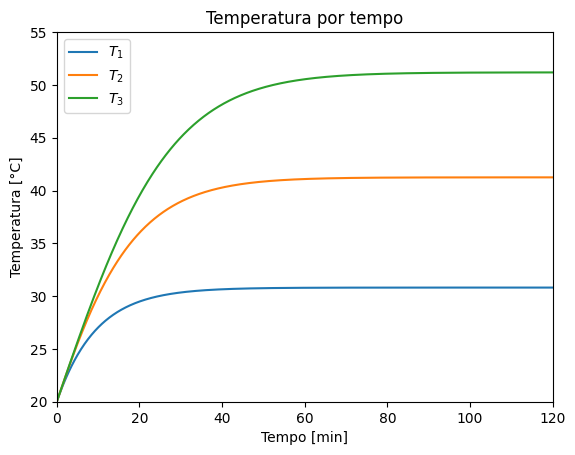

In [224]:
IC = 3 * [20 + 273.15]
int = (0, 120)
t, Temp = rk4(edo3_7, IC, int)
gera_dados_edo(t, Temp)
labels = [r'$T_1$', r'$T_2$', r'$T_3$']

fig, ax = plt.subplots()
for T, label in zip(Temp, labels):
    ax.plot(t, T - 273.15, label=label)
ax.set_title('Temperatura por tempo')
ax.set_xlabel('Tempo [min]')
ax.set_ylabel('Temperatura [°C]')
ax.axis([*int, 20, 55])
ax.legend()
plt.show()

In [225]:
def edo3_8(x, y):
    t = x
    Ca = y[0]
    Cb = y[1]
    Cc = y[2]
    Cd = y[3]
    Cain = 0.7
    Cbin = 0.4
    Ccin = 0
    Cdin = 0
    F = 5
    V = 40
    k = 0.855 * 60
    dCa = (F / V) * (Cain - Ca) - k * Ca * Cb
    dCb = (F / V) * (Cbin - Cb) - k * Ca * Cb
    dCc = (F / V) * (Ccin - Cc) + k * Ca * Cb
    dCd = (F / V) * (Cdin - Cd) + k * Ca * Cb
    return [dCa, dCb, dCc, dCd]

(0, 60)


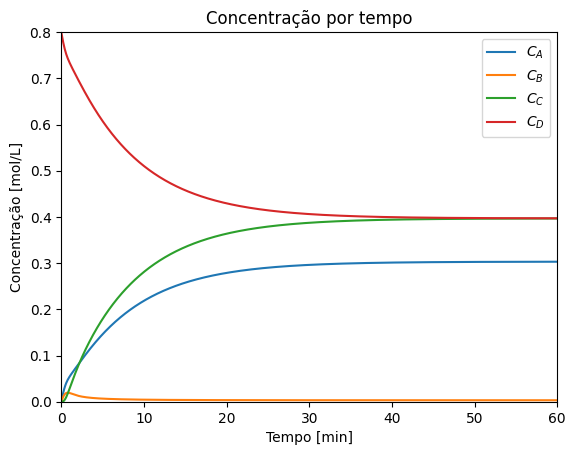

In [226]:
IC = [0, 0, 0, 0.8]
int = (0, 60)
t, C = rk4(edo3_8, IC, int)

labels = [r'$C_A$', r'$C_B$', r'$C_C$', r'$C_D$']

fig, ax = plt.subplots()
for c, label in zip(C, labels):
    ax.plot(t, c, label=label)
ax.set_title('Concentração por tempo')
ax.set_xlabel('Tempo [min]')
ax.set_ylabel('Concentração [mol/L]')
ax.axis([*int, 0, 0.8])
ax.legend()
print(int)
plt.show()